In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  

In [2]:
X,y = make_blobs(
    n_samples=200,
    centers=2,
    n_features=2,
    cluster_std=0.5,
    center_box=(-3.0,3.0),
    random_state=0
)

In [3]:

#initially y is  {0,1} converting so that y will be {-1,1}
y=2*y-1
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

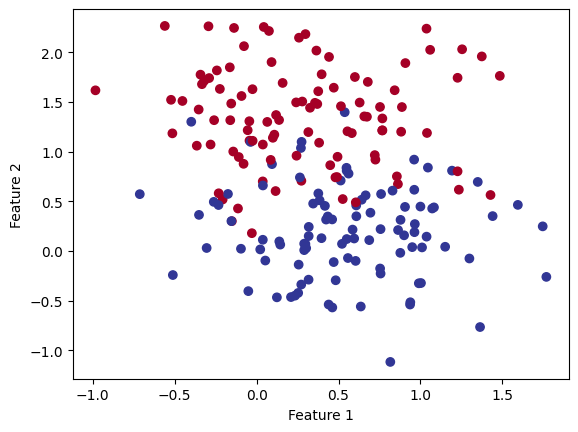

In [4]:

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [5]:
import numpy as np
x_min,x_max=X[:,0].min() ,X[:,0].max()
y_min,y_max=X[:,1].min() ,X[:,1].max()
xx, yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

x_in=np.c_[xx.ravel(),yy.ravel()]




In [21]:
print(xx.shape,yy.shape)

(100, 100) (100, 100)


In [14]:
x_in.shape

(10000, 2)

In [10]:
from perceptron import perceptron
model=perceptron(eta=0.002,max_iters=100)
model.train(X_train,y_train)
y_pred=model.predict(x_in).reshape(xx.shape)


In [ ]:
# y_pred = np.round(y_pred).reshape(xx.shape)

In [13]:
y_pred.shape

(10000,)

In [11]:
X_test.shape

(40, 2)

(-1.1169972802319437, 2.2665238958504115)

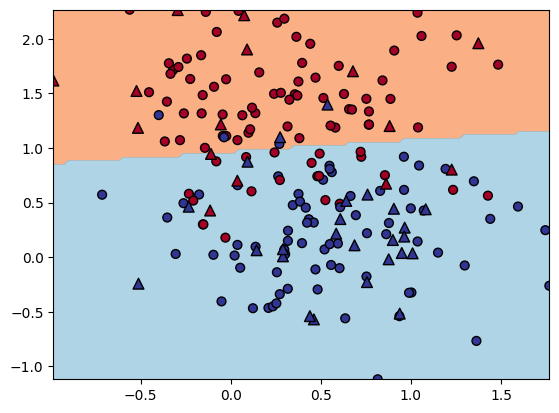

In [11]:
plt.contourf(xx, yy, y_pred,levels=[-2,0,2], cmap=plt.cm.RdYlBu, alpha=0.7 )
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=40, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=60, marker='^', cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [14]:
model2=perceptron(eta=0.002,max_iters=100)
model2.train(X_train,y_train)
y_preds=model2.predict(X_test)

In [15]:
correct=np.sum(y_preds==y_test)

print(f"Accuracy:{correct/len(y_test)*100}%")

Accuracy:85.0%


In [ ]:
#IMPLEMENTING XOR OPERATIONS
from perceptron import perceptron
import numpy as np
import pandas as pd
X_xor=np.array([[0,0],[0,1],[1,0],[1,1]])
y_target=np.array([-1,1,1,-1])
X_test=X_xor
y_test=y_target



In [23]:
#Using single perceptron
model_xor=perceptron(eta=0.1,max_iters=100)
model_xor.train(X_xor,y_target)
preds=model_xor.predict(X_test)
print(f"ACCURACY:{np.sum(preds==y_test)/len(y_test)*100}%")

ACCURACY:50.0%


In [29]:
#Using one perceptron as OR and one for NAND to impement XOR
y_or=np.array([-1,1,1,1])
y_nand=np.array([1,1,1,-1])
model_or=perceptron(eta=0.1,max_iters=100)
model_or.train(X_xor,y_or)
pred_or=model_or.predict(X_test)

model_nand=perceptron(eta=0.1,max_iters=100)
model_nand.train(X_xor,y_nand)
pred_nand=model_nand.predict(X_test)
def xor_sign(z):
    return np.where(z > 0, 1, -1)
final_preds=xor_sign(pred_or-pred_nand)

or_correct = np.sum(pred_or == y_or)
print(f"OR accuracy: {or_correct/4*100}%")

# Test NAND perceptron alone  
nand_correct = np.sum(pred_nand == y_nand)
print(f"NAND accuracy: {nand_correct/4*100}%")

print(f"Accuracy after combining:{np.sum(final_preds==y_test)/len(y_test)*100}%")



OR accuracy: 100.0%
NAND accuracy: 100.0%
Accuracy after combining:25.0%
